Shape: torch.Size([1, 155, 240, 240]), Selected slice index: 67
dict_keys(['flair', 't1', 't1ce', 't2', 'seg'])


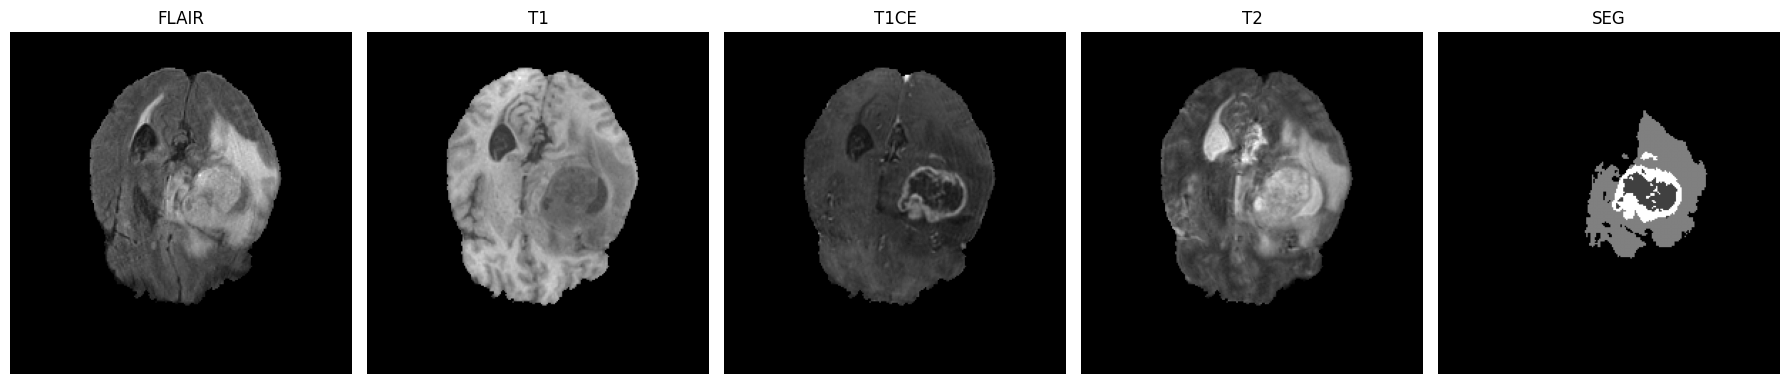

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os

def load_tensor(file_path):
    """ .pth 파일로부터 텐서를 로드하는 함수 """
    data = torch.load(file_path)
    return data

def rotate_and_visualize_slices(tensors, slice_index):
    """ 텐서 데이터의 주어진 슬라이스를 회전시키고 가로로 배열하여 시각화하는 함수 """
    fig, axes = plt.subplots(1, len(tensors), figsize=(18, 10))
    for i, (scan_type, tensor) in enumerate(tensors.items()):
        slice_data = tensor[0, slice_index, :, :].cpu().numpy()
        rotated_slice = np.rot90(np.rot90(slice_data))
        ax = axes[i]
        im = ax.imshow(rotated_slice, cmap='gray')
        ax.title.set_text(scan_type.upper())
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def visualize_patient_slices(patient_id, base_dir):
    """ 환자 ID에 따라 저장된 모든 MRI 시퀀스의 지정된 슬라이스를 회전시켜 시각화 """
    file_path = os.path.join(base_dir, f'{patient_id}_tensors.pth')
    tensors = load_tensor(file_path)
    num_slices = tensors['t1'].shape[1]

    black_areas = [torch.sum(tensors['seg'][0, i, :, :] < 0.5).item() for i in range(num_slices)]
    best_slice = np.argmin(black_areas)  

    print(f"Shape: {tensors['t1'].shape}, Selected slice index: {best_slice}")
    print(tensors.keys())
    rotate_and_visualize_slices(tensors, best_slice)

patient_id = 'BraTS20_Training_001'
base_dir = '../../../mnt/sda/suhohan/BraTS2020/preprocessed_tensors_train'
visualize_patient_slices(patient_id, base_dir)


Image shape: torch.Size([1, 240, 240])
Label shape: torch.Size([1, 240, 240])


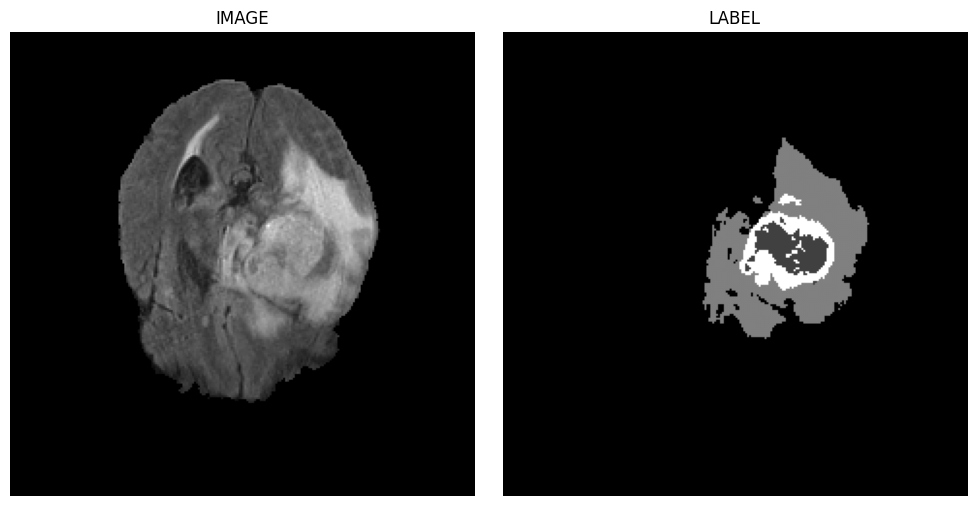

Image shape: torch.Size([1, 240, 240])
Label shape: torch.Size([1, 240, 240])


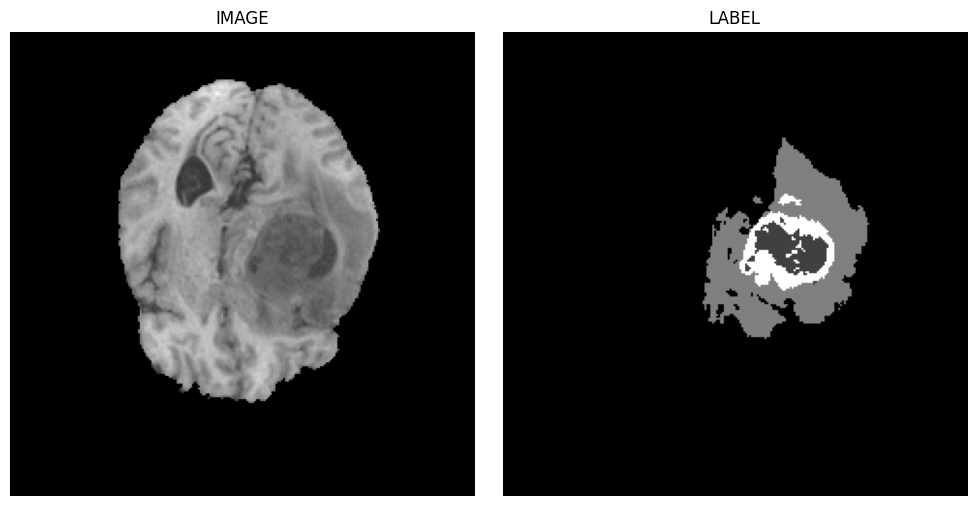

Image shape: torch.Size([1, 240, 240])
Label shape: torch.Size([1, 240, 240])


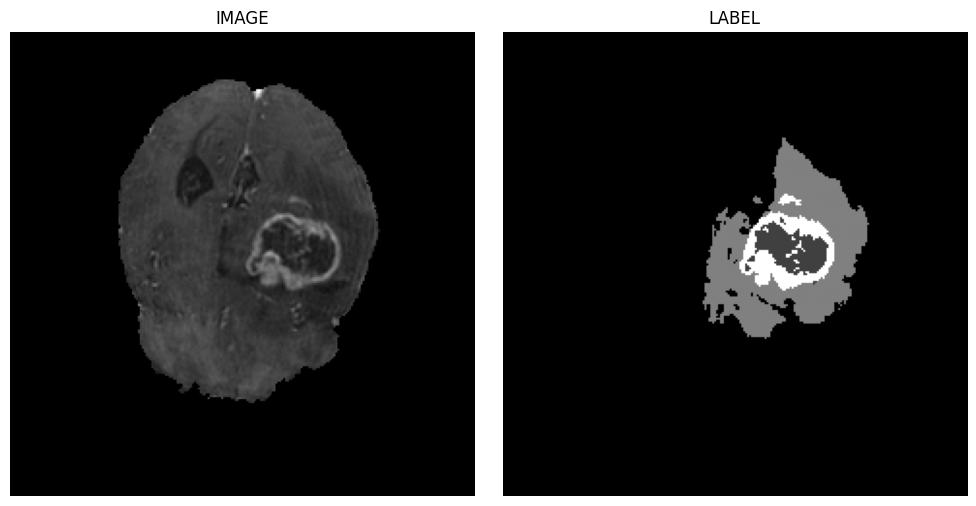

Image shape: torch.Size([1, 240, 240])
Label shape: torch.Size([1, 240, 240])


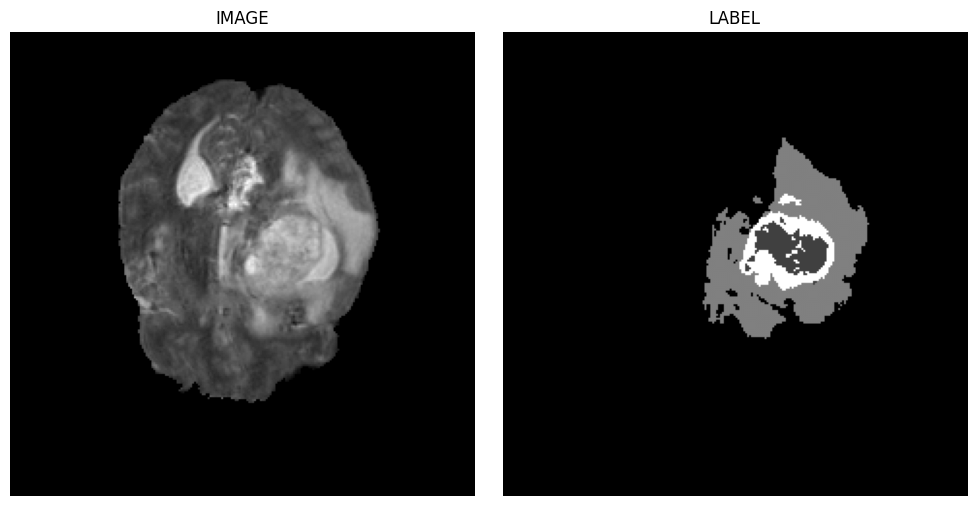

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os

def load_tensor(file_path):
    """ .pth 파일로부터 텐서를 로드하는 함수 """
    data = torch.load(file_path)
    return data

def rotate_and_visualize_slices(tensors):
    """ 텐서 데이터의 주어진 슬라이스를 회전시키고 가로로 배열하여 시각화하는 함수 """
    fig, axes = plt.subplots(1, len(tensors), figsize=(10, 5))
    for i, (type, tensor) in enumerate(tensors.items()):
        slice_data = tensor[0, :, :].cpu().numpy()
        rotated_slice = np.rot90(np.rot90(slice_data))
        ax = axes[i]
        im = ax.imshow(rotated_slice, cmap='gray')
        ax.title.set_text(type.upper())
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def visualize_one_channel(patient_id, base_dir):
    """ 환자 ID에 따라 저장된 모든 MRI 시퀀스의 지정된 슬라이스를 회전시켜 시각화 """
    file_path = os.path.join(base_dir, f'{patient_id}.pth')
    tensors = load_tensor(file_path)

    print(f"Image shape: {tensors['image'].shape}")
    print(f"Label shape: {tensors['label'].shape}")
    rotate_and_visualize_slices(tensors)

for i in range(4):
    patient_id = f'selected_tensor_train_{i}'
    base_dir = '../../../mnt/sda/suhohan/BraTS2020/selected_tensors_train'
    visualize_one_channel(patient_id, base_dir)

Image Shape: torch.Size([1, 240, 240])
Label Shape: torch.Size([1, 240, 240])


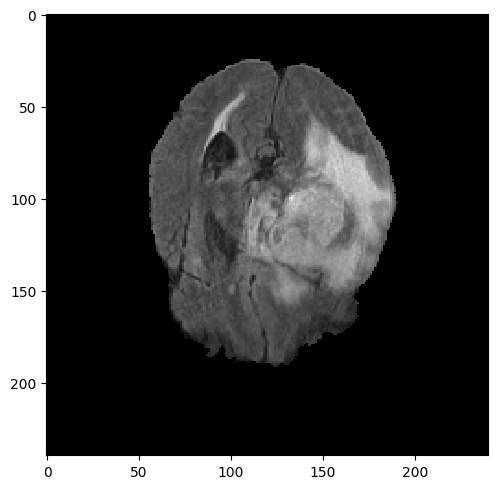

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

def load_tensor(file_path):
    return torch.load(file_path)

def rotate_and_visualize(tensor):
    fig, ax = plt.subplots(figsize=(6, 5))
    image = np.array(tensor['image']).squeeze()
    image = np.rot90(np.rot90(image))
    ax.imshow(image, cmap='gray', interpolation='none')


    plt.tight_layout()
    plt.show()

def visualize_one_channel(patient_id, base_dir):
    file_path = os.path.join(base_dir, f'{patient_id}.pth')
    tensor = load_tensor(file_path)
    print(f"Image Shape: {tensor['image'].shape}")
    print(f"Label Shape: {tensor['label'].shape}")
    rotate_and_visualize(tensor)

patient_id = 'selected_tensor_train_0'
base_dir = '../../../mnt/sda/suhohan/BraTS2020/selected_tensors_train'
visualize_one_channel(patient_id, base_dir)

Image Shape: torch.Size([1, 240, 240])
Label Shape: torch.Size([1, 240, 240])


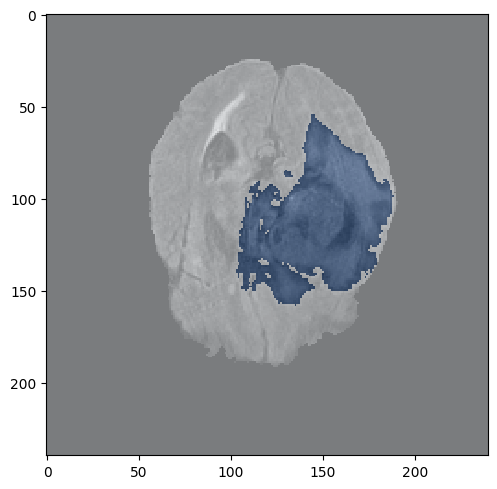

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

def load_tensor(file_path):
    return torch.load(file_path)

def rotate_and_visualize(tensor):
    fig, ax = plt.subplots(figsize=(6, 5))
    image = np.array(tensor['image']).squeeze()
    image = np.rot90(np.rot90(image))
    label = np.rot90(np.rot90(np.array(tensor['label'][-1, :, :]>0)))

    # 이미지를 그레이스케일로 표시
    ax.imshow(image, cmap='gray', interpolation='none')

    # 레이블을 하늘색으로 표시
    # overlay = np.ma.masked_where(label < 0, label)  # 레이블이 0인 부분은 마스크 처리
    ax.imshow(label, cmap='Blues', alpha=0.5, interpolation='none')  # 알파값을 조정하여 투명도 적용

    plt.tight_layout()
    plt.show()

def visualize_one_channel(patient_id, base_dir):
    file_path = os.path.join(base_dir, f'{patient_id}.pth')
    tensor = load_tensor(file_path)
    print(f"Image Shape: {tensor['image'].shape}")
    print(f"Label Shape: {tensor['label'].shape}")
    rotate_and_visualize(tensor)

patient_id = 'selected_tensor_train_0'
base_dir = '../../../mnt/sda/suhohan/BraTS2020/selected_tensors_train'
visualize_one_channel(patient_id, base_dir)

Image Shape: torch.Size([1, 240, 240])
Label Shape: torch.Size([1, 240, 240])


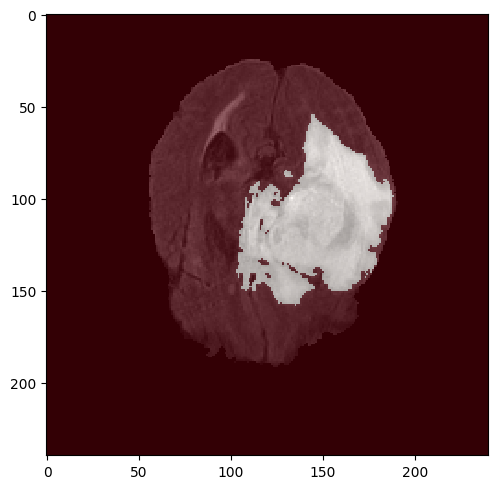

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

def load_tensor(file_path):
    return torch.load(file_path)

def rotate_and_visualize(tensor):
    fig, ax = plt.subplots(figsize=(6, 5))
    image = np.array(tensor['image']).squeeze()
    image = np.rot90(np.rot90(image))
    label = np.rot90(np.rot90(np.array(tensor['label'][-1, :, :]<0)))

    # 이미지를 그레이스케일로 표시
    ax.imshow(image, cmap='gray', interpolation='none')

    # 레이블을 하늘색으로 표시
    # overlay = np.ma.masked_where(label < 0, label)  # 레이블이 0인 부분은 마스크 처리
    ax.imshow(label, cmap='Reds', alpha=0.5, interpolation='none')  # 알파값을 조정하여 투명도 적용

    plt.tight_layout()
    plt.show()

def visualize_one_channel(patient_id, base_dir):
    file_path = os.path.join(base_dir, f'{patient_id}.pth')
    tensor = load_tensor(file_path)
    print(f"Image Shape: {tensor['image'].shape}")
    print(f"Label Shape: {tensor['label'].shape}")
    rotate_and_visualize(tensor)

patient_id = 'selected_tensor_train_0'
base_dir = '../../../mnt/sda/suhohan/BraTS2020/selected_tensors_train'
visualize_one_channel(patient_id, base_dir)